In [622]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [623]:
data_frame = pd.read_csv('Sonar-Prediction-ML\sonar_data.csv',header = None)

In [624]:
data_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [625]:
X = data_frame.drop(columns = 60,axis = 1)

In [626]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [627]:
Y = data_frame[60]

In [628]:
Y = Y.map({'M': 1, 'R': 0}).astype(int)

In [629]:
Y.tail()

203    1
204    1
205    1
206    1
207    1
Name: 60, dtype: int32

In [630]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int32

In [631]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=35,stratify=Y,shuffle=True)

In [632]:
model = LogisticRegression()

In [633]:
model.fit(X_train,Y_train)

LogisticRegression()

In [634]:
train_pred_acc = model.predict(X_train)

In [635]:
prediction = accuracy_score(Y_train,train_pred_acc)

In [636]:
print(prediction)

0.8614457831325302


In [637]:
test_pred_acc = model.predict(X_test)

In [638]:
prediction_test = accuracy_score(test_pred_acc,Y_test)

In [639]:
print(prediction_test)

0.8571428571428571


In [640]:
import matplotlib.pyplot as plt
from scipy.special import expit

In [641]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, test_pred_acc)
cnf_matrix

array([[15,  5],
       [ 1, 21]], dtype=int64)

In [642]:
Y_test.value_counts()

1    22
0    20
Name: 60, dtype: int64

In [643]:
import seaborn as sns

Text(0.5, 355.0, 'Predicted label')

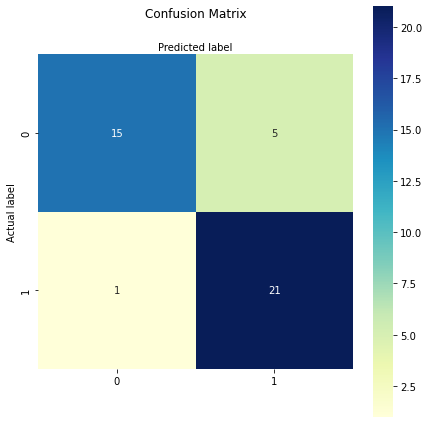

In [644]:
class_names=['R','M'] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',square=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [645]:
from sklearn import metrics

In [646]:
print("Accuracy:",'%.2f' % metrics.accuracy_score(Y_test, test_pred_acc))
print("Precision:",'%.2f' %metrics.precision_score(Y_test, test_pred_acc))
print("Recall:",'%.2f' %metrics.recall_score(Y_test, test_pred_acc))
print("F1 Score:", 2*(metrics.precision_score(Y_test, test_pred_acc)*metrics.recall_score(Y_test, test_pred_acc)/(metrics.recall_score(Y_test, test_pred_acc)+metrics.precision_score(Y_test, test_pred_acc))))

Accuracy: 0.86
Precision: 0.81
Recall: 0.95
F1 Score: 0.875


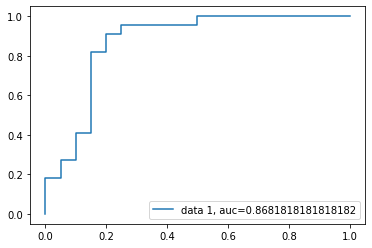

In [647]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()